# Performance of CTS_TSP:
## Using Hybrid Solvers

In [ ]:
import numpy as np
import utility

from clustered_tsp_solver import ClusteredTspSolver

In [ ]:
seed = 1543

##Optimal Cost and Optimal Route:
###For number of vehicles variying from 2 to 9 and the number of clients as two times the number of vehicles.

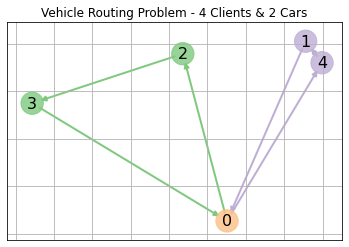

CTS - Optimized Cost: 98.26867414259141




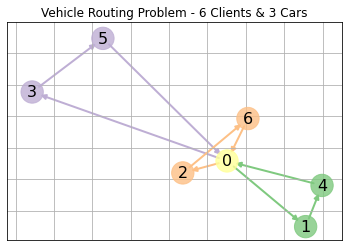

CTS - Optimized Cost: 63.30136422188866




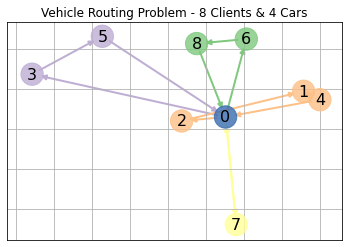

CTS - Optimized Cost: 173.60834203102058




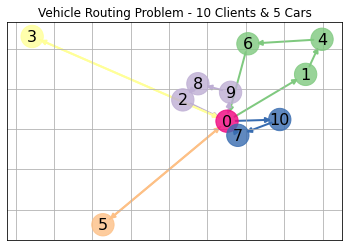

CTS - Optimized Cost: 203.70554071432252




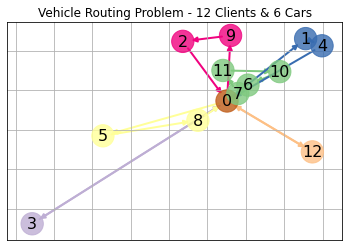

CTS - Optimized Cost: 231.55205469187604




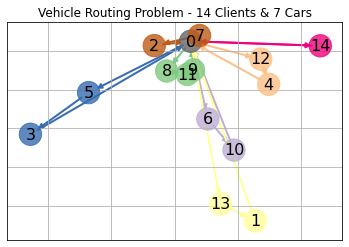

CTS - Optimized Cost: 351.1920543146589




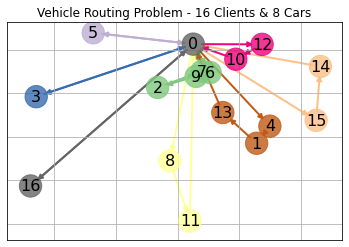

CTS - Optimized Cost: 433.2029405524845




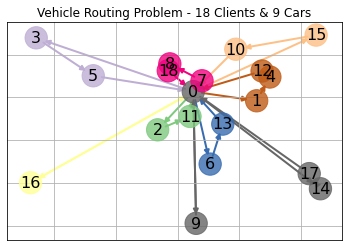

CTS - Optimized Cost: 360.8607476683719




In [ ]:
vrp_list = []
for m in range(2,10,1):
    n = 2*m 
    instance, xc, yc = utility.generate_vrp_instance(n, seed)
    vrp = ClusteredTspSolver(n, m, instance)
    vrp.solve(solver='leap')
    vrp_list.append(vrp)
    vrp.visualize(xc, yc)
    print(f'CTS - Optimized Cost: {vrp.evaluate_vrp_cost()}')
    print('\n')

##QUBO Build Times:

In [ ]:
for vrp in vrp_list:
    print(vrp.timing['qubo_build_time'])

20064.592361450195
26483.774185180664
44233.56056213379
48270.463943481445
64357.51914978027
56695.69969177246
78479.29000854492
77860.83221435547


## D-Wave QPU Access Times:

In [ ]:
for vrp in vrp_list:
    print(vrp.timing['qpu_access_time'])

105414
107490
74688
116452
100807
100178
106989
106117


##Plots for QUBO Build Times:

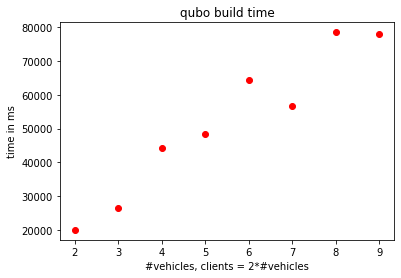

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,10), [y.timing['qubo_build_time'] for y in vrp_list], 'ro')
plt.title('qubo build time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

using logarithmic scale


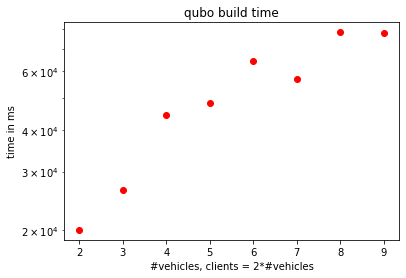

In [ ]:
print('using logarithmic scale')
plt.plot(range(2,10), [y.timing['qubo_build_time'] for y in vrp_list], 'ro')
plt.yscale("log")
plt.title('qubo build time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

##Plots for QPU Access Times:

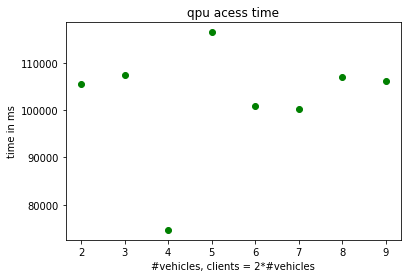

In [ ]:
plt.plot(range(2,10), [y.timing['qpu_access_time'] for y in vrp_list], 'go')
plt.title('qpu acess time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

using logarithmic scale


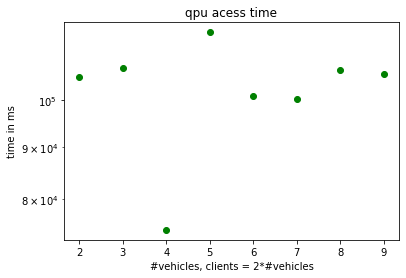

In [ ]:
print('using logarithmic scale')
plt.plot(range(2,10), [y.timing['qpu_access_time'] for y in vrp_list], 'go')
plt.yscale("log")
plt.title('qpu acess time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

##Plots for QPU Access Times for clustering:

using logarithmic scale


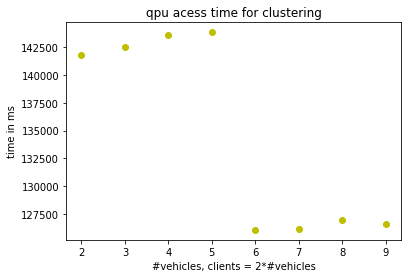

In [ ]:
print('using logarithmic scale')
plt.plot(range(2,10), [y.timing['clustering_time']['qpu_access_time'] for y in vrp_list], 'yo')
plt.title('qpu acess time for clustering')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

using logarithmic scale


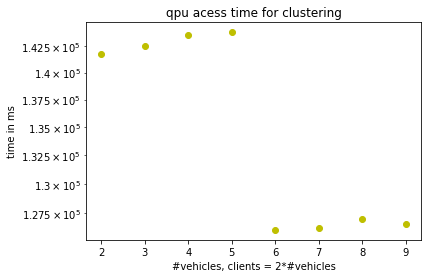

In [ ]:
print('using logarithmic scale')
plt.plot(range(2,10), [y.timing['clustering_time']['qpu_access_time'] for y in vrp_list], 'yo')
plt.yscale("log")
plt.title('qpu acess time for clustering')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

##Plots for Total Times:

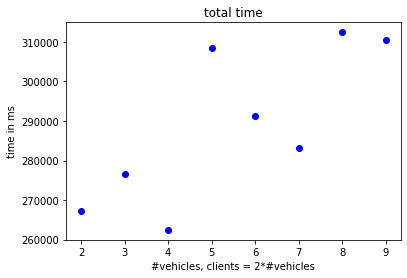

In [ ]:
total_time = []
for y in vrp_list:
    t = (y.timing['qpu_access_time'] + y.timing['qubo_build_time'] + y.timing['clustering_time']['qpu_access_time'])
    total_time.append(t)


plt.plot(range(2,10), total_time, 'bo')
plt.title('total time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()

using logarithmic scale


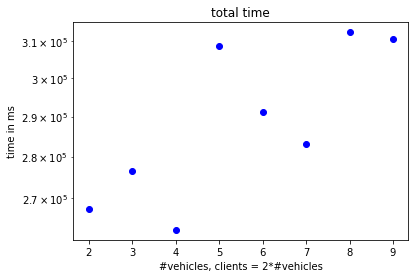

In [ ]:
print('using logarithmic scale')
plt.yscale("log")
plt.plot(range(2,10), total_time, 'bo')
plt.title('total time')
plt.xlabel("#vehicles, clients = 2*#vehicles")
plt.ylabel("time in ms")
plt.show()